In [1]:
import numpy as np
import pandas as pd
print('Imported libraries sucessfully')

Imported libraries sucessfully


In [2]:
df = pd.read_csv(r"C:\Users\sai\ML\Salary_Data.csv")
df[:3]

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0


In [3]:
# Seperate input
X = df[['YearsExperience']]
X[:3]

,YearsExperience
0,1.1
1,1.3
2,1.5


In [4]:
# Seperate output
y=df.Salary
y[:3]

0    39343.0
1    46205.0
2    37731.0
Name: Salary, dtype: float64

#### Spiltting data

In [5]:
# use train test split
from sklearn.model_selection import train_test_split

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,train_size=0.8,random_state=42)

#### Training data

In [7]:
len(X_train)

24

In [8]:
len(y_train)

24

#### Testing data

In [9]:
len(X_test)

6

In [10]:
len(y_test)

6

### Training phase

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model = LinearRegression()

In [13]:
model.fit(X_train,y_train)

LinearRegression()

In [14]:
# Checking training score
model.score(X_train,y_train)*100

96.45401573418147

### Testing phase

In [15]:
model.predict(X_test)

array([115790.21011287,  71498.27809463, 102596.86866063,  75267.80422384,
        55477.79204548,  60189.69970699])

In [16]:
y_pred = model.predict(X_test)
y_pred

array([115790.21011287,  71498.27809463, 102596.86866063,  75267.80422384,
        55477.79204548,  60189.69970699])

In [17]:
X_test_new = X_test.copy()

In [18]:
X_test_new

,YearsExperience
27,9.6
15,4.9
23,8.2
17,5.3
8,3.2
9,3.7


In [19]:
X_test_new['predicted'] = y_pred

In [21]:
X_test_new

,YearsExperience,predicted
27,9.6,115790.210113
15,4.9,71498.278095
23,8.2,102596.868661
17,5.3,75267.804224
8,3.2,55477.792045
9,3.7,60189.699707


In [22]:
X_test_new['actual'] = y_test

In [23]:
# Error = Actual - prdicted
error = X_test_new.actual - X_test_new.predicted
error

27    -3155.210113
15    -3560.278095
23    11215.131339
17     7820.195776
8      8967.207955
9     -3000.699707
dtype: float64

In [24]:
X_test_new['error'] = error

In [25]:
X_test_new

,YearsExperience,predicted,actual,error
27,9.6,115790.210113,112635.0,-3155.210113
15,4.9,71498.278095,67938.0,-3560.278095
23,8.2,102596.868661,113812.0,11215.131339
17,5.3,75267.804224,83088.0,7820.195776
8,3.2,55477.792045,64445.0,8967.207955
9,3.7,60189.699707,57189.0,-3000.699707


In [26]:
X_test

,YearsExperience
27,9.6
15,4.9
23,8.2
17,5.3
8,3.2
9,3.7


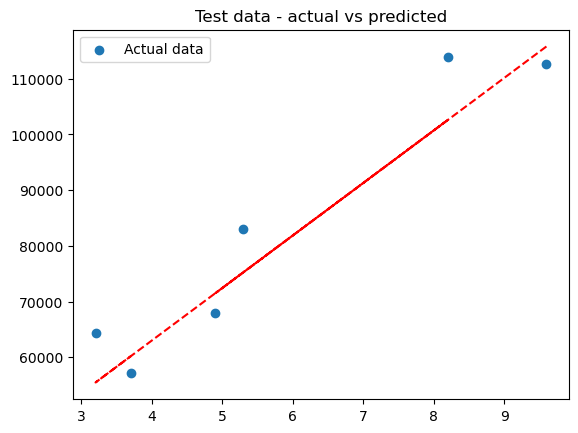

In [33]:
# Plot the graph
import matplotlib.pyplot as plt
plt.scatter(X_test,y_test,label='Actual data')
plt.plot(X_test,y_pred,'--r')
plt.title('Test data - actual vs predicted')
plt.legend()
plt.show()

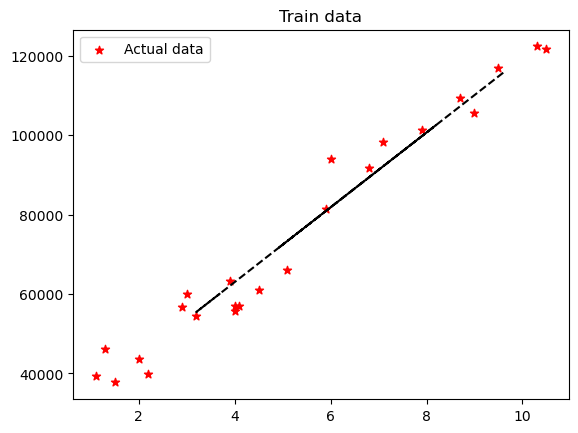

In [35]:
plt.scatter(X_train,y_train,label='Actual data',color='red',marker='*')
plt.plot(X_test,y_pred,'--k')
plt.title('Train data')
plt.legend()
plt.show()

In [37]:
# Claculate score test data
model.score(X_test,y_test)*100

90.24461774180497

In [38]:
# Calculate the score of precdicted data
model.score(X_test,y_pred)*100

100.0